<a href="https://colab.research.google.com/github/Manas-Negi/Codsoft_Tasks/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
# tensorflow library is made for machine learning in general while keras is made specifically for training neural networks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [5]:
df=pd.read_csv('/content/Churn_Modelling.csv')
# reading data from Chrun_Modelling.csv that we upload to colab from local machine

In [6]:
df.head()
# viewing a small section of the data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.drop(columns = ['RowNumber','CustomerId','Surname'], inplace= True )
df.head()
# dropping columns that are not important for us for analysis

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.isnull().sum()
#checking for missing value fields

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Text(0.5, 1.0, 'Comparsion betweeen Countries and Customers')

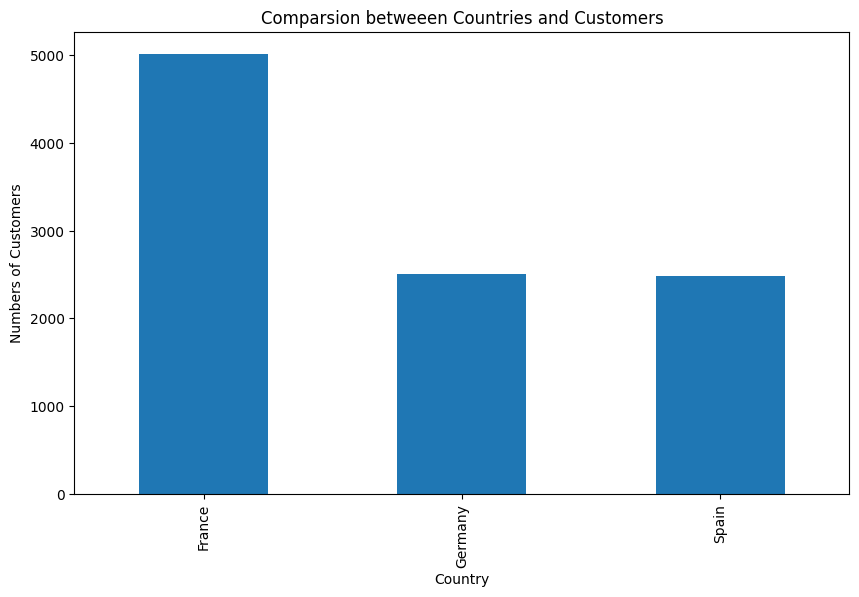

In [12]:
plt.figure(figsize=(10, 6))
df['Geography'].value_counts().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Numbers of Customers')
plt.title("Comparsion betweeen Countries and Customers")

Text(0.5, 1.0, 'Comparsion betweeen Exited and Customers')

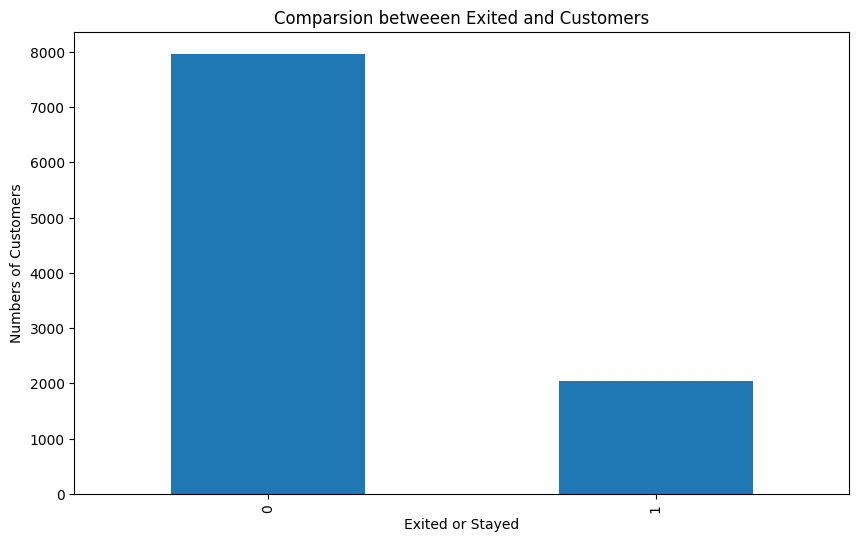

In [13]:
plt.figure(figsize=(10, 6))
df['Exited'].value_counts().plot(kind='bar')
plt.xlabel('Exited or Stayed')
plt.ylabel('Numbers of Customers')
plt.title("Comparsion betweeen Exited and Customers")

Text(0.5, 1.0, 'Comparsion betweeen Genders')

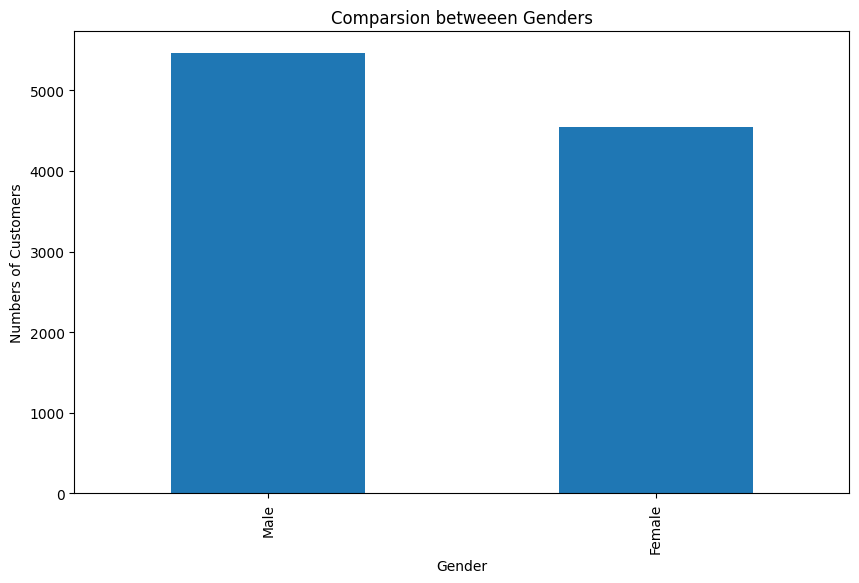

In [14]:
plt.figure(figsize=(10, 6))
df['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Numbers of Customers')
plt.title("Comparsion betweeen Genders")

In [15]:
df= pd.get_dummies(df, columns= ['Geography', 'Gender'], drop_first=True)
# performing one-hot encoding

In [16]:
X=df.drop(columns=['Exited'])
y=df['Exited']
# storing the target variable into y after removing it from main dataframe

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=3)

In [18]:
sc=StandardScaler()
# creating standard scaler object from StandardScaler class
X_train=sc.fit_transform(X_train)
# learning mean and standard deviation from X_train for different categories then subtracting the mean and dividing by standard deviation
X_test=sc.transform(X_test)
# applying the previously learned transformation to test data

In [19]:
classifier=Sequential()
# using a sequential model to build our neural network

In [20]:
classifier.add(Dense(6,activation='relu',input_dim=11))
classifier.add(Dense(6,activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))
# these 3 layers define the input layer, output layer and the hidden layer of our neural network

Input Layer:

Dense layer with 6 neurons and ReLU activation.
Expects input data with 11 features.
Hidden Layer:

Dense layer with 6 neurons and ReLU activation.
Output Layer:

Dense layer with 1 neuron and Sigmoid activation.
Produces binary classification probabilities.

In [21]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [22]:
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
# compiling the model with the optimizer, loss function and metrics to track accuracy

In [23]:
history = classifier.fit(X_train,y_train,batch_size=10,epochs=100,verbose=1,validation_split=0.25)
# training the model using training data and storing information of each epoch in history for analysis

Epoch 1/100
563/563 [==============================] - 10s 6ms/step - loss: 0.4977 - accuracy: 0.7927 - val_loss: 0.4424 - val_accuracy: 0.8027
Epoch 2/100
563/563 [==============================] - 3s 5ms/step - loss: 0.4466 - accuracy: 0.7957 - val_loss: 0.4273 - val_accuracy: 0.8027
Epoch 3/100
563/563 [==============================] - 2s 4ms/step - loss: 0.4356 - accuracy: 0.7957 - val_loss: 0.4232 - val_accuracy: 0.8027
Epoch 4/100
563/563 [==============================] - 3s 5ms/step - loss: 0.4307 - accuracy: 0.7957 - val_loss: 0.4216 - val_accuracy: 0.8027
Epoch 5/100
563/563 [==============================] - 3s 5ms/step - loss: 0.4275 - accuracy: 0.7957 - val_loss: 0.4204 - val_accuracy: 0.8027
Epoch 6/100
563/563 [==============================] - 3s 5ms/step - loss: 0.4251 - accuracy: 0.7957 - val_loss: 0.4193 - val_accuracy: 0.8027
Epoch 7/100
563/563 [==============================] - 3s 4ms/step - loss: 0.4228 - accuracy: 0.7957 - val_loss: 0.4189 - val_accuracy: 0.802

In [24]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)
y_pred
# predicting probabilities and comparing performance using a threshold of 0.5

79/79 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [25]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
cf
# creating a confusion matrix and using it to evaluate performance

array([[1902,   80],
       [ 265,  253]])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
# measuring percentage of correct predictions using accuracy score

0.862

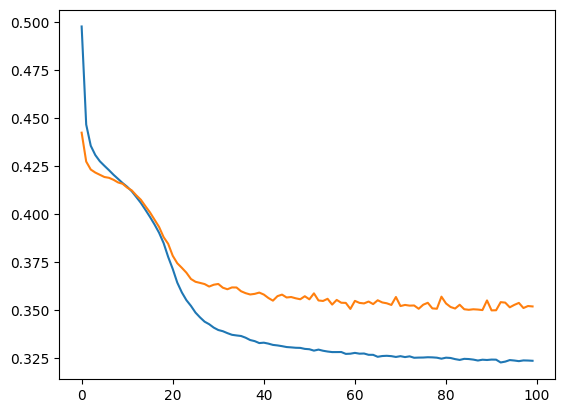

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# comparing training loss and validation loss for evaluating performance and overfitting

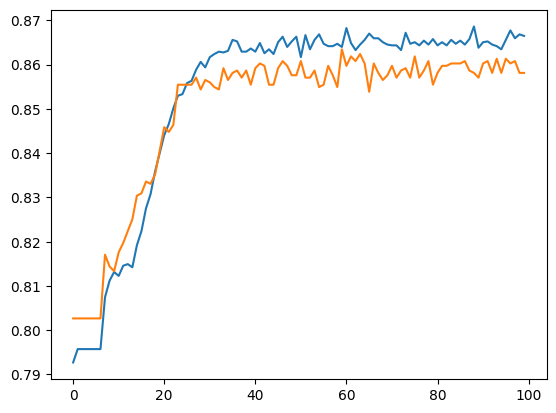

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# comparing accuracy and validation accuracy